Steps done in this Project :
      

*   Dataset Loading

*   Importing Necessary Packages

*   Storing the Dataset in Array and Conversion to Grayscale Images

*   Shuffling of Dataset

*   Normalisation of Original Dataset

*   Binarization of Original Dataset

*   Sigma Guard Algorithm Definition

*   Entropy Fluctuation Patrol Algorithm Definition

*   Passing Data to the Sigma Guard Algorithm
*   Passing Data to EF Patrol Algorithm


*   Normalization Definition


*   Normalization of Algorithm Outputs


*   Context Sensitive Data Enrichment (CSDE) Algorithm Definition


*   Passing into CSDE Algorithm


*   Further Updation of EF Patrol Images


*   Libraries of S2Net Model


*   Reshaping into 3D Array


*   Train and Test Spliting

*   S2Net Model Definition

*   S2Net Model Compilation

*   Output of EF Patrol Passing into the Model

*   Output of Sigma Guard Passing into the Model

*   Model Evaluation of EF Patrol

*   Model Evaluation of Sigma Guard
*   Save the Models to the Drive


*   Confusion Matrix & Classification Report of EF Patrol - S2Net


*   Confusion Matrix & Classification Report of Sigma Guard - S2Net


*   SSIM, PSNR, Histogram Intersection Metrics Evaluation for EF Patrol Vs Sigma Guard


Mounting the Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import cv2
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam, RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [30]:
import pickle

# Path to save the variable file in Google Drive
file_path = '/content/drive/MyDrive/Copy of my_gdata.pkl'

# Load the variable from the pickle file
with open(file_path, 'rb') as f:
    gdata = pickle.load(f)

In [3]:
import pickle

# Path to save the variable file in Google Drive
file_path = '/content/drive/MyDrive/Copy of my_ydata.pkl'

# Load the variable from the pickle file
with open(file_path, 'rb') as f:
    y = pickle.load(f)

In [ ]:
ngdata=[]
Mg=[]
for i in gdata:
    min_val = np.min(i)
    max_val = np.max(i)
    normalized_gray_image = (i - min_val) / (max_val - min_val)
    mg=np.mean(normalized_gray_image)
    ngdata.append(normalized_gray_image)
    Mg.append(mg)

len(ngdata)

ngdata1=copy.deepcopy(ngdata)
ngdata2=copy.deepcopy(ngdata)
ngdata3=copy.deepcopy(ngdata)
ngdata4=copy.deepcopy(ngdata)

In [6]:
import pickle

# Path to save the variable file in Google Drive
file_path = '/content/drive/MyDrive/Copy of finalefvariable.pkl'

# Load the variable from the pickle file
with open(file_path, 'rb') as f:
    final_ef_img = pickle.load(f)

In [7]:
import pickle

# Path to save the variable file in Google Drive
file_path = '/content/drive/MyDrive/Copy of finalsgvariable.pkl'

# Load the variable from the pickle file
with open(file_path, 'rb') as f:
    final_sg_img = pickle.load(f)

Libraries of S2Net Model

In [8]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from keras.models import load_model, Sequential, Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.regularizers import l2
from sklearn.model_selection import StratifiedKFold

Reshaping into 3D Array

In [9]:
x1=final_ef_img
x2=final_sg_img
img_size=256
x1 = np.array(x1).reshape(-1, img_size, img_size, 1)   # x1 - EF Patrol
x2= np.array(x2).reshape(-1, img_size, img_size, 1)   # x2 - Sigma Guard
y1 = np.array(y)
y2 = copy.deepcopy(y1)
len(x1)
len(x2)

2000

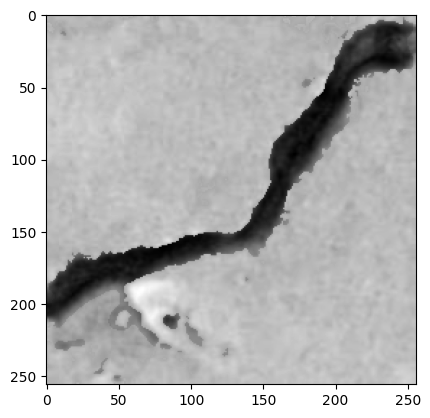

In [10]:
plt.imshow(x2[999],cmap='gray')

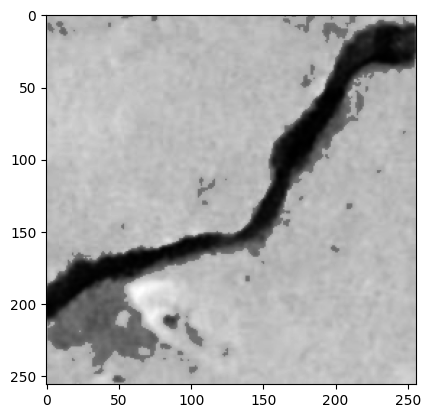

In [11]:
plt.imshow(x1[999],cmap='gray')

S2Net Model Definition

In [12]:
class S2Net:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.autoencoder = self.build_autoencoder()
        self.ef_model = self.build_classifier()
        self.sg_model = self.build_classifier()

    def build_autoencoder(self):
        encoder_input = Input(shape=self.input_shape)
        encoder = Conv2D(32, (3, 3), activation='relu', padding='same')(encoder_input)
        encoder = MaxPooling2D((2, 2), padding='same')(encoder)
        encoder = Conv2D(64, (3, 3), activation='relu', padding='same')(encoder)
        encoder_output = MaxPooling2D((2, 2), padding='same')(encoder)

        decoder = Conv2D(64, (3, 3), activation='relu', padding='same')(encoder_output)
        decoder = UpSampling2D((2, 2))(decoder)
        decoder = Conv2D(32, (3, 3), activation='relu', padding='same')(decoder)
        decoder = UpSampling2D((2, 2))(decoder)
        decoder_output = Conv2D(1, (3, 3), activation='tanh', padding='same')(decoder)

        autoencoder = Model(encoder_input, decoder_output)
        return autoencoder

    def build_classifier(self):
        model = Sequential()
        model.add(self.autoencoder)
        model.add(Conv2D(64, 3, padding="same", activation="relu"))
        model.add(MaxPooling2D())

        model.add(Conv2D(64, 3, padding="same", activation="relu"))
        model.add(MaxPooling2D())

        model.add(Conv2D(128, 3, padding="same", activation="relu"))
        model.add(MaxPooling2D())

        model.add(Flatten())
        model.add(Dense(256, activation="relu"))
        model.add(Dropout(0.5))
        model.add(BatchNormalization())
        model.add(Dense(2, activation="softmax"))

        return model

# Example usage
input_shape = (256, 256, 1)
s2net = S2Net(input_shape)


Model Architecture Display

In [13]:
!pip install visualkeras
!pip install pydot
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 11.2 MB/s eta 0:00:00


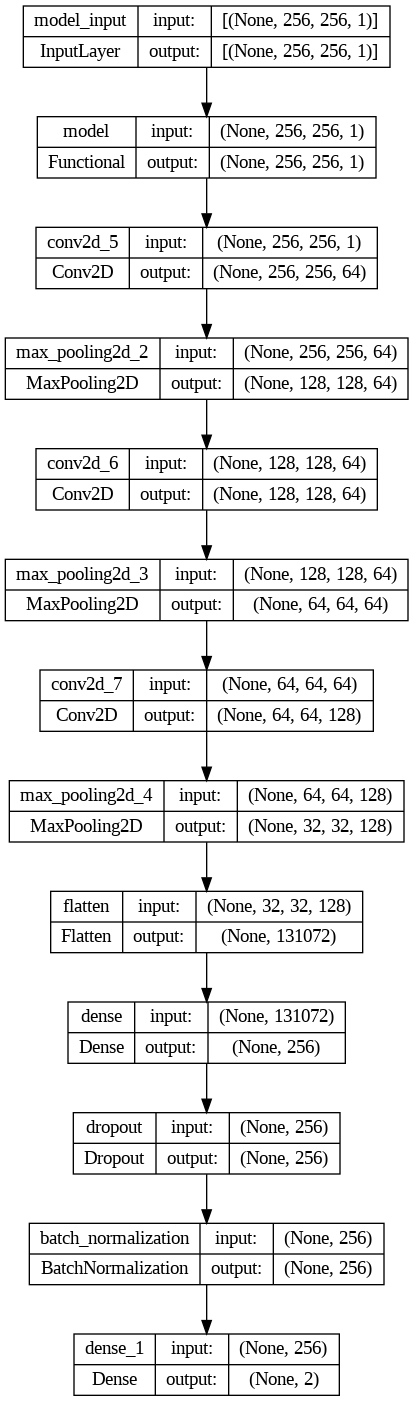

In [14]:
from tensorflow.keras.utils import plot_model
plot_model(s2net.ef_model, to_file='s2model_architecture.png', show_shapes=True, show_layer_names=True)

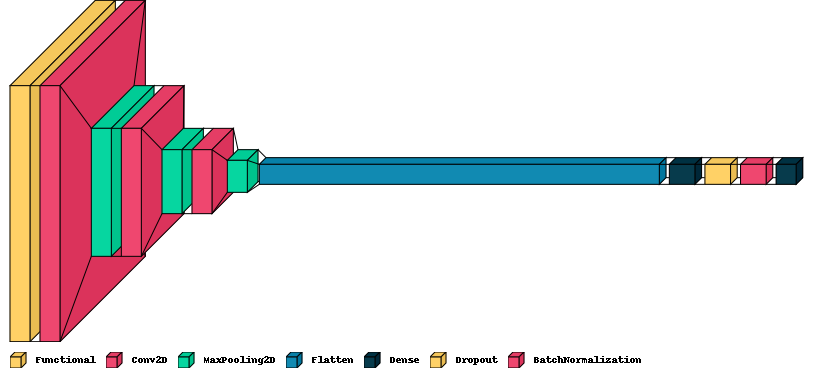

In [15]:
from IPython.display import display
from visualkeras import layered_view

descriptions = [
    "Input (227x227x1)",
    "Conv2D (32 filters, 3x3, activation='relu', padding='same')",
    "MaxPooling2D (2x2, padding='same')",
    "Conv2D (64 filters, 3x3, activation='relu', padding='same')",
    "MaxPooling2D (2x2, padding='same')",
    "Conv2D (64 filters, 3x3, activation='relu', padding='same')",
    "UpSampling2D (2x2)",
    "Conv2D (32 filters, 3x3, activation='relu', padding='same')",
    "UpSampling2D (2x2)",
    "Conv2D (1 filter, 3x3, activation='tanh', padding='same')",
    "Conv2D (64 filters, 3x3, activation='relu', padding='same')",
    "MaxPooling2D",
    "Conv2D (64 filters, 3x3, activation='relu', padding='same')",
    "MaxPooling2D",
    "Conv2D (128 filters, 3x3, activation='relu', padding='same')",
    "MaxPooling2D",
    "Flatten",
    "Dense (256 units, activation='relu')",
    "Dropout (0.5)",
    "BatchNormalization",
    "Dense (2 units, activation='softmax')",
    "Output (2)"
]

# Assuming 'model' is your Keras model
display(layered_view(s2net.ef_model, legend=descriptions, to_file='s2arch.png', scale_xy=1))

Output of EF Patrol Passing into the Model

In [20]:
# Assuming x and y are your complete dataset and labels
x1_train, x1_temp, y1_train, y1_temp = train_test_split(x1, y1, test_size=0.2, random_state=42,shuffle=False)
x1_val, x1_test, y1_val, y1_test = train_test_split(x1_temp, y1_temp, test_size=0.5, random_state=42,shuffle=False)

opt = Adam(learning_rate=1e-5)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model 1 for Algorithm 1
s2net.ef_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

ef_history = s2net.ef_model.fit(
    x1_train, y1_train, batch_size=32,
    epochs=20,  # Increase the number of epochs
    validation_data=(x1_val, y1_val),
    callbacks=[early_stopping]
)
s2net.ef_model.summary()

Epoch 1/20
50/50 [==============================] - 12s 195ms/step - loss: 0.2979 - accuracy: 0.9181 - val_loss: 0.1239 - val_accuracy: 0.9600
Epoch 2/20
50/50 [==============================] - 9s 180ms/step - loss: 0.0829 - accuracy: 0.9737 - val_loss: 0.1363 - val_accuracy: 0.9550
Epoch 3/20
50/50 [==============================] - 9s 181ms/step - loss: 0.0515 - accuracy: 0.9887 - val_loss: 0.1365 - val_accuracy: 0.9550
Epoch 4/20
50/50 [==============================] - 9s 186ms/step - loss: 0.0424 - accuracy: 0.9919 - val_loss: 0.1230 - val_accuracy: 0.9550
Epoch 5/20
50/50 [==============================] - 9s 186ms/step - loss: 0.0413 - accuracy: 0.9919 - val_loss: 0.0965 - val_accuracy: 0.9750
Epoch 6/20
50/50 [==============================] - 9s 183ms/step - loss: 0.0280 - accuracy: 0.9975 - val_loss: 0.1059 - val_accuracy: 0.9650
Epoch 7/20
50/50 [==============================] - 9s 187ms/step - loss: 0.0276 - accuracy: 0.9975 - val_loss: 0.0957 - val_accuracy: 0.9800
Epoch

Output of Sigma Guard Passing into the Model

In [22]:
# Assuming x and y are your complete dataset and labels
x2_train, x2_temp, y2_train, y2_temp = train_test_split(x2, y2, test_size=0.2, random_state=42,shuffle=False)
x2_val, x2_test, y2_val, y2_test = train_test_split(x2_temp, y2_temp, test_size=0.5, random_state=42, shuffle=False)

opt = Adam(learning_rate=1e-5)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model 2 for Algorithm 2
s2net.sg_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sg_history = s2net.sg_model.fit(
    x2_train, y2_train, batch_size=32,
    epochs=20,  # Increase the number of epochs
    validation_data=(x2_val, y2_val),
    callbacks=[early_stopping]
)
s2net.sg_model.summary()

Epoch 1/20
50/50 [==============================] - 13s 194ms/step - loss: 0.0793 - accuracy: 0.9731 - val_loss: 0.0426 - val_accuracy: 0.9850
Epoch 2/20
50/50 [==============================] - 9s 183ms/step - loss: 0.0188 - accuracy: 0.9956 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 3/20
50/50 [==============================] - 9s 183ms/step - loss: 0.0112 - accuracy: 0.9994 - val_loss: 0.0089 - val_accuracy: 0.9950
Epoch 4/20
50/50 [==============================] - 9s 181ms/step - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.0153 - val_accuracy: 0.9950
Epoch 5/20
50/50 [==============================] - 9s 182ms/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.0233 - val_accuracy: 0.9900
Epoch 6/20
50/50 [==============================] - 9s 183ms/step - loss: 0.0130 - accuracy: 0.9962 - val_loss: 0.1580 - val_accuracy: 0.9200
Epoch 7/20
50/50 [==============================] - 9s 183ms/step - loss: 0.0205 - accuracy: 0.9956 - val_loss: 0.0156 - val_accuracy: 0.9950
Epoch

Model Evaluation of EF Patrol

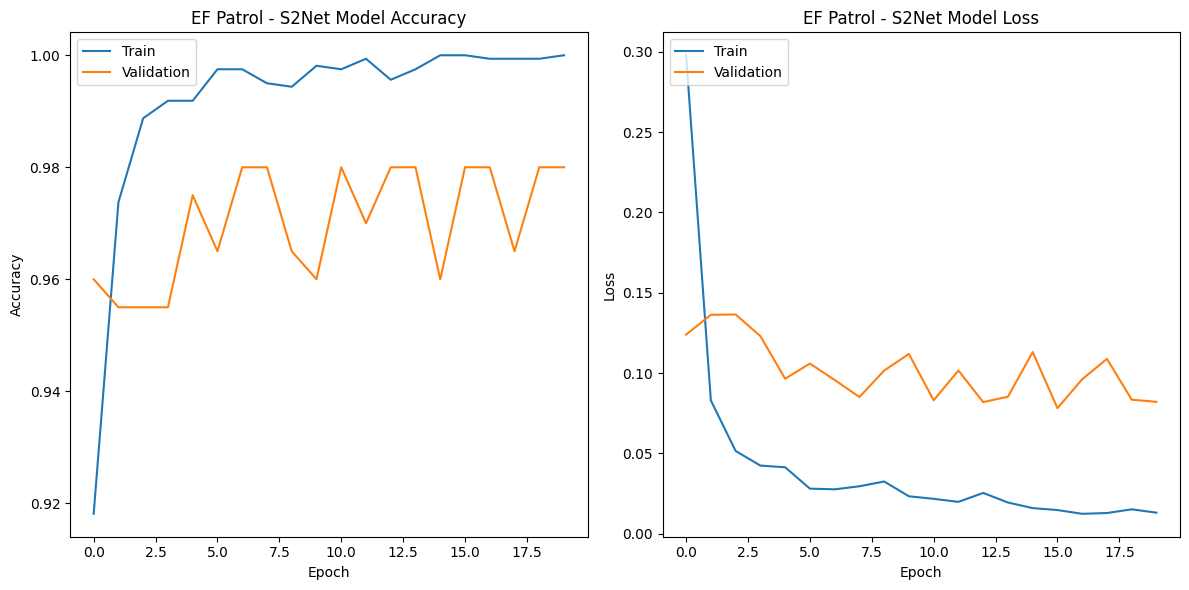

7/7 [==============================] - 0s 50ms/step - loss: 0.1242 - accuracy: 0.9600
EF Patrol - S2Net Test Accuracy: 96.00%


In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ef_history.history['accuracy'])
plt.plot(ef_history.history['val_accuracy'])
plt.title('EF Patrol - S2Net Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(ef_history.history['loss'])
plt.plot(ef_history.history['val_loss'])
plt.title('EF Patrol - S2Net Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Evaluate the model on the test set
ef_test_loss, ef_test_accuracy = s2net.ef_model.evaluate(x1_test, y1_test, verbose=1)
print("EF Patrol - S2Net Test Accuracy: {:.2f}%".format(ef_test_accuracy * 100))


Model Evaluation of Sigma Guard

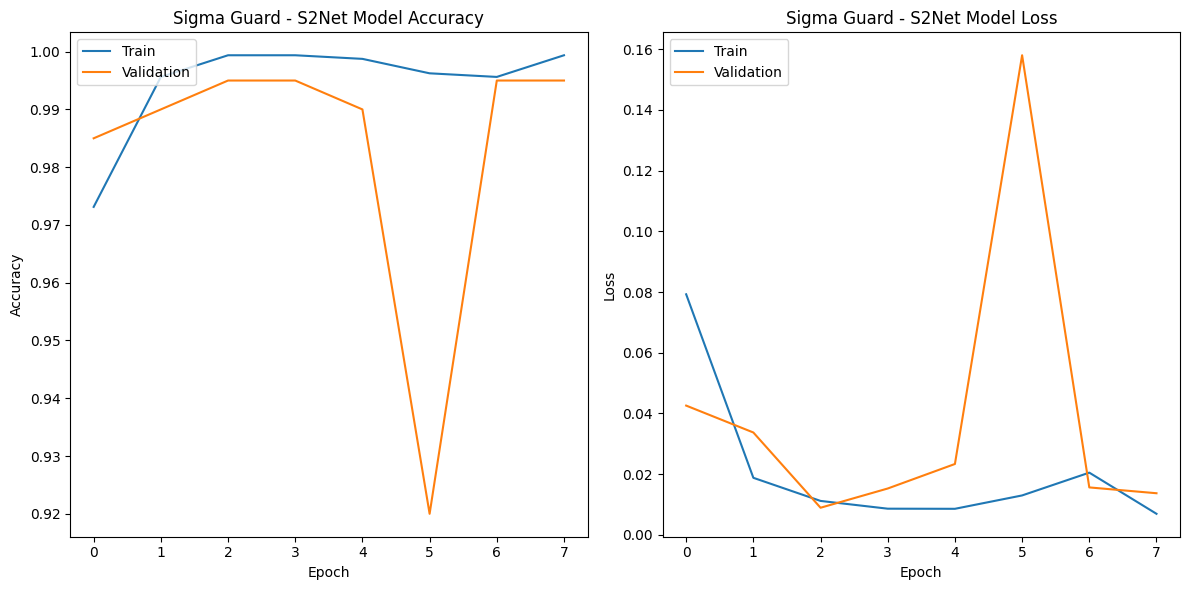

7/7 [==============================] - 0s 49ms/step - loss: 0.1974 - accuracy: 0.9650
Sigma Guard - S2Net Test Accuracy: 96.50%


In [23]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(sg_history.history['accuracy'])
plt.plot(sg_history.history['val_accuracy'])
plt.title('Sigma Guard - S2Net Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(sg_history.history['loss'])
plt.plot(sg_history.history['val_loss'])
plt.title('Sigma Guard - S2Net Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Evaluate the model on the test set
sg_test_loss, sg_test_accuracy = s2net.sg_model.evaluate(x2_test, y2_test, verbose=1)
print("Sigma Guard - S2Net Test Accuracy: {:.2f}%".format(sg_test_accuracy * 100))


Save the Model to the Drive

In [24]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Save the final fold model to Google Drive
s2net.ef_model.save("/content/drive/MyDrive/ef-model1.h5")
s2net.ef_model.save("/content/drive/MyDrive/ef-model2.h5")

# Save the final fold model to Google Drive
s2net.sg_model.save("/content/drive/MyDrive/sg-model1.h5")
s2net.sg_model.save("/content/drive/MyDrive/sg-model2.h5")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Confusion Matrix & Classification Report of EF Patrol - S2Net

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'best_model' is your trained model
# Assuming 'x_test' and 'y_test' are your test data
y_pred_probs1 = s2net.ef_model.predict(x1_test)

# Extract predicted classes using argmax
y_pred_classes1 = y_pred_probs1.argmax(axis=1)
y_true_classes1 = y1_test.astype(int)



# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes1, y_pred_classes1))

# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true_classes1, y_pred_classes1)
print(conf_matrix)


7/7 [==============================] - 1s 57ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        91
           1       0.89      0.96      0.93       109

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

Confusion Matrix:
[[ 78  13]
 [  4 105]]


Confusion Matrix & Classification Report of Sigma Guard - S2Net

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming 'best_model' is your trained model
# Assuming 'x_test' and 'y_test' are your test data
y_pred_probs2 = s2net.sg_model.predict(x2_test)

# Extract predicted classes using argmax
y_pred_classes2 = y_pred_probs2.argmax(axis=1)
y_true_classes2 = y2_test.astype(int)



# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes2, y_pred_classes2))

# Print confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true_classes2, y_pred_classes2)
print(conf_matrix)


7/7 [==============================] - 0s 56ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        91
           1       0.95      0.99      0.97       109

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200

Confusion Matrix:
[[ 85   6]
 [  1 108]]


Structural Similarity Index Measure (SSIM) Metric Evaluation

In [27]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

ef_ssim=[]
for i in range(0,len(y)):
    ssimval = ssim(ngdata4[i], final_ef_img[i], data_range=1)
    ef_ssim.append(ssimval)

sg_ssim=[]
for i in range(0,len(y)):
    ssimval = ssim(ngdata4[i], final_sg_img[i], data_range=1)
    sg_ssim.append(ssimval)

ef_sum=0
sg_sum=0
for i in ef_ssim:
    ef_sum=ef_sum+i
for j in sg_ssim:
    sg_sum=sg_sum+j

ef_ssim_res=ef_sum/len(data)
sg_ssim_res=sg_sum/len(data)

print(f"EF Patrol Algorithm. SSIM : {ef_ssim_res:.2f}")
print(f"Sigma Gaurd Algorithm. SSIM : {sg_ssim_res:.2f}")

if sg_ssim_res > ef_ssim_res:
    print("Sigma Guard Algorithm is better then EF Patrol Algorithm")
else:
    print("EF_Patrol Algorithm is better then Sigma Gaurd Algorithm")


NameError: name 'data' is not defined

Histogram - Intersection Metric Evaluation

Histogram Intersection - EF Patrol

In [ ]:
sum=0
for i in range(0,len(data)):
      ng_scaled = np.uint8(ngdata1[i] * 255)
      ef_scaled = np.uint8(final_ef_img[i] * 255)

      # Compute histograms
      histogram_original = cv2.calcHist([ng_scaled], [0], None, [256], [0, 256])
      histogram_ef = cv2.calcHist([ef_scaled], [0], None, [256], [0, 256])

      # Normalize histograms
      cv2.normalize(histogram_original, histogram_original, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
      cv2.normalize(histogram_ef, histogram_ef, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

      # Compute intersection
      intersection_metric = cv2.compareHist(histogram_original, histogram_ef, cv2.HISTCMP_INTERSECT)
      sum+=intersection_metric

print(sum)
print("Intersection Metric:", sum/len(data))


Histogram Intersection - Sigma Guard

In [ ]:
sum1=0
for i in range(0,len(data)):
      ng_scaled = np.uint8(ngdata1[i] * 255)
      sg_scaled = np.uint8(final_sg_img[i] * 255)

      # Compute histograms
      histogram_original = cv2.calcHist([ng_scaled], [0], None, [256], [0, 256])
      histogram_sg = cv2.calcHist([sg_scaled], [0], None, [256], [0, 256])

      # Normalize histograms
      cv2.normalize(histogram_original, histogram_original, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
      cv2.normalize(histogram_sg, histogram_sg, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

      # Compute intersection
      intersection_metric1 = cv2.compareHist(histogram_original, histogram_sg, cv2.HISTCMP_INTERSECT)
      sum1+=intersection_metric1

print(sum1)
print("Intersection Metric:", sum1/len(data))


Histogram Intersection Result

In [ ]:
print("Histogram - Intersection Result : ")
if intersection_metric1 > intersection_metric:
    print("Sigma Guard Algorithm is better then EF Patrol Algorithm ")
else:
    print("EF_Patrol Algorithm is better then Sigma Gaurd Algorithm")


Histogram Intersection Plot

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(histogram_original, color='b', label='Histogram of Image 1')
plt.plot(histogram_ef, color='r', label='Histogram of Image 2')

plt.title('Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)


plt.plot(histogram_original, color='b', label='Histogram of Image 1')
plt.plot(histogram_sg, color='r', label='Histogram of Image 2')

plt.title('Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency ')
plt.legend()

plt.show()
plt.show()

Peak Signal to Noise Ratio Evaluation

PSNR - EF Patrol

In [ ]:
# Calculate MSE (Mean Squared Error)
max_pixel_value = 1.0
sumpsnr1=0
for i in range(0,len(data)):
  mse = np.mean((final_ef_img[i] - ngdata3[i]) ** 2)
  # Calculate PSNR
  efpsnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
  sumpsnr1+=efpsnr

print("PSNR:", sumpsnr1/len(data))


PSNR - Sigma Guard

In [ ]:
# Calculate MSE (Mean Squared Error)
max_pixel_value = 1.0
sumpsnr2=0
for i in range(0,len(data)):
  mse = np.mean((final_sg_img[i] - ngdata3[i]) ** 2)
  # Calculate PSNR
  sgpsnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
  sumpsnr2+=sgpsnr

print("PSNR:", sumpsnr2/len(data))


PSNR Result

In [ ]:
print("PSNR Result : ")
if sumpsnr2/len(data) > sumpsnr1/len(data):
    print("Sigma Guard Algorithm is better then EF Patrol Algorithm ")
else:
    print("EF_Patrol Algorithm is better then Sigma Gaurd Algorithm")


Single Image Prediction

In [ ]:
from keras.models import load_model

# Load the model from Google Drive
model_path = "/content/drive/MyDrive/sg-model1.h5"
sgmodel = load_model(model_path)


# Load the model from Google Drive
model_path = "/content/drive/MyDrive/ef-model1.h5"
efmodel = load_model(model_path)


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from PIL import Image
import io
import copy
from google.colab import files

# Function to preprocess the image
def preprocess_image(image):
  resized_image = cv2.resize(image, (256, 256))
  grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
  min_val = np.min(grayscale_image)
  max_val = np.max(grayscale_image)
  normalized_gray_image = (grayscale_image - min_val) / (max_val - min_val)
  normalized_gray_image1 = copy.deepcopy(normalized_gray_image)
  mg = np.mean(normalized_gray_image)
  Inverted_image = calculate_standard_deviation(grayscale_image)
  min_value = np.min(Inverted_image)
  max_value = np.max(Inverted_image)
  normalized_result_map = (Inverted_image - min_value) / (max_value - min_value)
  ms = np.mean(normalized_result_map)
  img = update_image(normalized_gray_image, normalized_result_map, ms, mg)
  return img

# Function to perform prediction
def predict_image(image):
    p_image = preprocess_image(image)
    predictions = sgmodel.predict(p_image.reshape(-1, 256, 256, 1))
    # If you want to get the predicted class labels instead of probabilities, you can use argmax
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class

# Upload the image
uploaded = files.upload()

# Read the uploaded image
file_name = list(uploaded.keys())[0]
image = cv2.imread(file_name)

# Perform prediction
prediction = predict_image(image)
# Assuming it's a binary classification, you might want to threshold the prediction

plt.imshow(image,cmap='gray')

if prediction == 0:
  print("Non-Crack Image")
else:
  print("Crack Image")


# Print the prediction result as a string
print("Predicted class:", prediction)


